### Task 2
### Author :  Manisha Das
### Objective :
From the given 'Iris' dataset , determine the optimal number of clusters and represent it visually

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

### Import the Dataset

In [3]:
iris=pd.read_csv('Iris.csv')

In [4]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Check If There Is Any Missing Observation In the Dataset

In [5]:
iris.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


From the above information, it is clear that there is no missing observation in the dataset

### Preparing the Dataset for Unsupervised Classification

In [7]:
# Since we are doing unsupervised classification, we will not be using the Species column in our analysis

X=iris.drop(['Id','Species'],axis=1)

In [8]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### Finding the Optimal Number of Clusters Using KMeans Clustering

In [9]:
from sklearn.cluster import KMeans

In [10]:
wcss=[]

for i in range(1,10):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
   
    

### The Elbow Method For Determining the Optimal Number of Clusters

Text(0.5, 1.0, 'The Elbow Method')

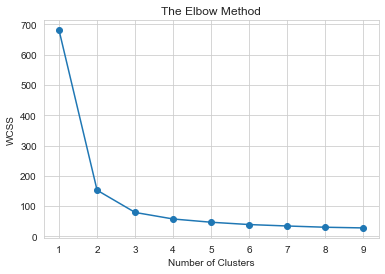

In [11]:
plt.plot(range(1,10),wcss,'o-')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow Method')

Here the optimal number of clusters is 3. The reason is that WCSS(Within Cluster Sum of Squares) does not fall significantly as the number of clusters is raised beyond 3. Increasing the number of clusters beyond 3 may lead to the problem of overfitting.


 Now we will perform our analysis when the optimal number of clusters is 3

### Clustering Analysis When the Optimal Number of Clusters Is 3

In [12]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
kmeans.fit(X)
y_pred=kmeans.predict(X)
print(y_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


In [13]:
centers = kmeans.cluster_centers_
print(centers)

[[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


The array represents the centers of 3 clusters.

### Visual Representation of 3 Clusters

Here we have considered two features : 'SepalLengthCm' and 'SepalWidthCm', and represented the clusters with respect to those features.

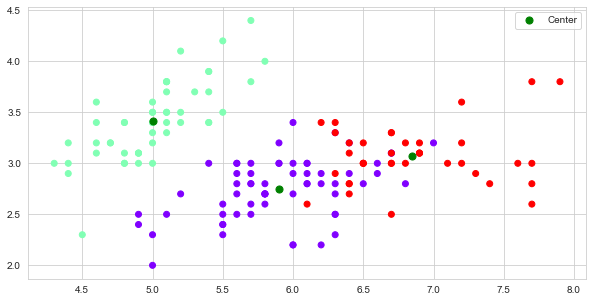

In [14]:
plt.figure(figsize=(10,5))
plt.scatter(X['SepalLengthCm'],X['SepalWidthCm'],c=y_pred,cmap='rainbow')
plt.scatter(centers[:,0],centers[:,1],c='green',s=50,label='Center')
plt.legend()